In [1]:
# Jupyter Notebook: analisis_recursos.ipynb

# =====================================================
# 0. Instalar dependencias
# =====================================================

%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install numpy
%pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# analisis_distribucion_columas.ipynb

# =====================================================
# 1. Importar librerías
# =====================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Para que los gráficos se vean en el notebook
%matplotlib inline

# Configuración estética 
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# =====================================================
# 2. Cargar el archivo en un DataFrame
# =====================================================

df_thetech = pd.read_excel("../../data/recursos_clasificados.xlsx")

# Combinando los DataFrames (si hubiera más de uno)
df = pd.concat([df_thetech], axis=0, ignore_index=True)

print("Filas y columnas:", df.shape)
df.head()

Filas y columnas: (247, 12)


,Filename,Name,Resource type,Values,Key competences,Knowledege areas,Cc concepts,Ct skills,Duration,School years,Languages,URL
0,Tarjetas-Bebras-I.pdf,Desafío Bebras: Retos de Pensamiento Computaci...,Actividad enchufada,Fomento de la creatividad y del espíritu cient...,"Comunicación Lingüística, Competencia Digital,...",Informática y Robótica,"Algoritmia y Programación, Sistemas Informáticos","Abstracción, Descomposición, Patrones, Pensami...",NaN,NaN,Español,NaN
1,Tarjetas-Bebras-Tanda-2.pdf,Desafío Bebras,Actividad desenchufada,"Pensamiento crítico, Educación para la Salud, ...","Competencia Digital, Competencia Matemática y ...","Informática y Robótica, Matemáticas","Algoritmia y Programación, Análisis de Datos, ...","Pensamiento Algorítmico y Programación, Razona...",NaN,"3º ESO, 4º ESO, 1º Bachillerato, 2º Bachillerato",Español,https://pensamientocomputacional.ceibal.edu.uy...
2,Building_ai_education_ori_digital-2.pdf,Construyendo la Inteligencia Artificial para l...,"Actividad enchufada, Curso",Fomento de la creatividad y del espíritu cient...,"Competencia Digital, Competencia Matemática y ...","Informática y Robótica, Matemáticas, Ética, Fi...","Algoritmia y Programación, Análisis de Datos, ...","Abstracción, Descomposición, Patrones, Pensami...",Semana (2-4 sesiones),"Primer Ciclo EP, Segundo Ciclo EP, Tercer Cicl...",Inglés,https://pensamientocomputacional.ceibal.edu.uy...
3,2023-Numero-la-rana_Guia-docentes.pdf,La rana que aprendió a contar,Programación visual,"Fomento de la creatividad, Pensamiento crítico...","Competencia Digital, Competencia Matemática y ...","Informática y Robótica, Matemáticas, Lengua y ...","Algoritmia y Programación, Análisis de Datos","Abstracción, Descomposición, Pensamiento Algor...",2 Meses (15-30 sesiones),"Primer Ciclo EP, Segundo Ciclo EP, Tercer Cicl...",Español,https://pensamientocomputacional.ceibal.edu.uy...
4,2024-Nuestro-Show-Programado-Guia-docentes.pdf,Nuestro Show programado,"Programación visual, Curso",Fomento de la creatividad y del espíritu cient...,"Comunicación Lingüística, Competencia Digital,...","Informática y Robótica, Arte, Lengua y Literatura",Algoritmia y Programación,"Descomposición, Razonamiento Lógico, Patrones,...",Mes (5-15 sesiones),"Segundo Ciclo EP, Tercer Ciclo EP",Español,https://pensamientocomputacional.ceibal.edu.uy...


In [3]:
# =====================================================
# 3. Definir columnas a excluir del análisis
# =====================================================
exclude_cols = ["Filename", "Name", "URL"]
columns_to_analyze = [c for c in df.columns if c not in exclude_cols]

print("Columnas que se van a analizar:\n", columns_to_analyze)

Columnas que se van a analizar:
 ['Resource type', 'Values', 'Key competences', 'Knowledege areas', 'Cc concepts', 'Ct skills', 'Duration', 'School years', 'Languages']


In [4]:
# =====================================================
# 4. Función para separar valores múltiples
# =====================================================
def split_multivalue(column_series):
    """
    Convierte strings con valores separados por comas en listas de valores.
    Ejemplo: 'Abstracción, Descomposición' -> ['Abstracción', 'Descomposición']
    """
    # Reemplazamos NaN por cadena vacía para evitar errores al hacer split
    column_series = column_series.fillna("")
    
    # En cada fila se separan por comas y se limpian espacios
    splitted_lists = []
    for cell in column_series:
        # Separamos por comas
        parts = cell.split(",")
        # Eliminamos espacios sobrantes y cadenas vacías
        parts = [p.strip() for p in parts if p.strip() != ""]
        splitted_lists.append(parts)
    
    return splitted_lists


=== 'Resource type' ===
  Actividad desenchufada: 126 recurso(s)
  Programación visual: 100 recurso(s)
  Actividad enchufada: 67 recurso(s)
  Curso: 51 recurso(s)
  Vídeo: 42 recurso(s)
  Dispositivos físicos: 40 recurso(s)
  Programación textual: 14 recurso(s)


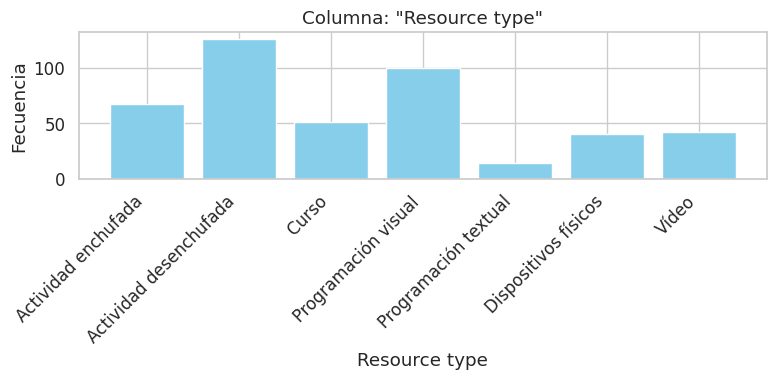


=== 'Values' ===
  Pensamiento crítico: 245 recurso(s)
  Fomento de la creatividad y del espíritu científico: 222 recurso(s)
  Trabajo en equipo: 218 recurso(s)
  Buen uso de las TIC: 177 recurso(s)
  Convivencia y Educación Cívica: 129 recurso(s)
  Atención a la diversidad: 86 recurso(s)
  Educación Ambiental y desarrollo sostenible: 59 recurso(s)
  Interculturalidad: 23 recurso(s)
  Igualdad de Género: 22 recurso(s)
  Educación para la Salud: 20 recurso(s)
  Fomento de la creatividad: 4 recurso(s)


/tmp/ipykernel_4761/138675755.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


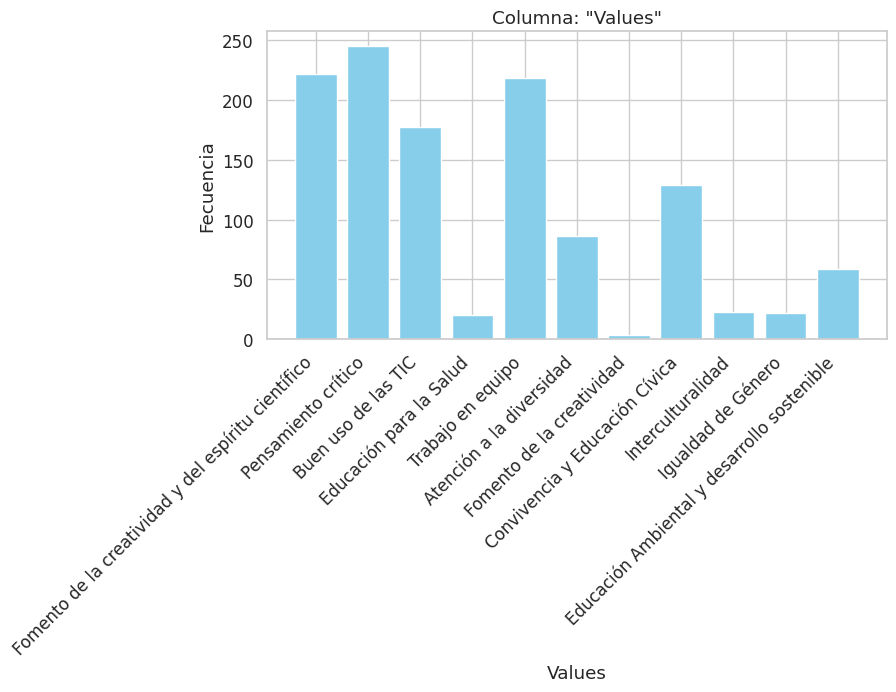


=== 'Key competences' ===
  Aprender a Aprender: 240 recurso(s)
  Competencia Matemática y en Ciencia y Tecnología: 218 recurso(s)
  Competencia Digital: 197 recurso(s)
  Sociales y Cívicas: 164 recurso(s)
  Comunicación Lingüística: 156 recurso(s)
  Plurilingüe: 5 recurso(s)


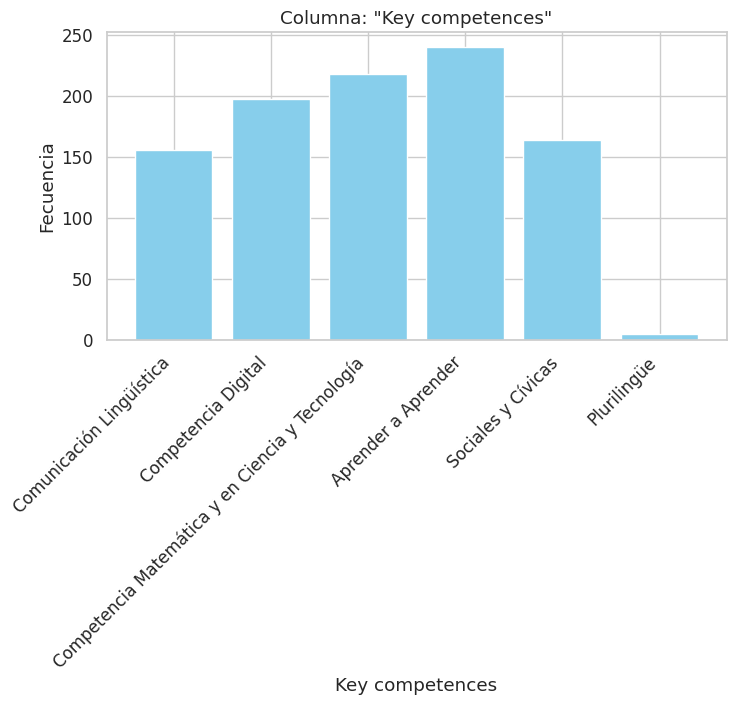


=== 'Knowledege areas' ===
  Informática y Robótica: 231 recurso(s)
  Matemáticas: 116 recurso(s)
  Ética: 95 recurso(s)
  Lengua y Literatura: 94 recurso(s)
  Arte: 87 recurso(s)
  Biología y Geología: 75 recurso(s)
  Filosofía: 49 recurso(s)
  Geografía e Historia: 34 recurso(s)
  Música: 24 recurso(s)
  Deporte: 6 recurso(s)
  Física: 2 recurso(s)
  Tecnología: 2 recurso(s)
  Ciencias (Biología y Geología): 1 recurso(s)
  Física y Química: 1 recurso(s)
  Física (dentro de Biología y Geología): 1 recurso(s)


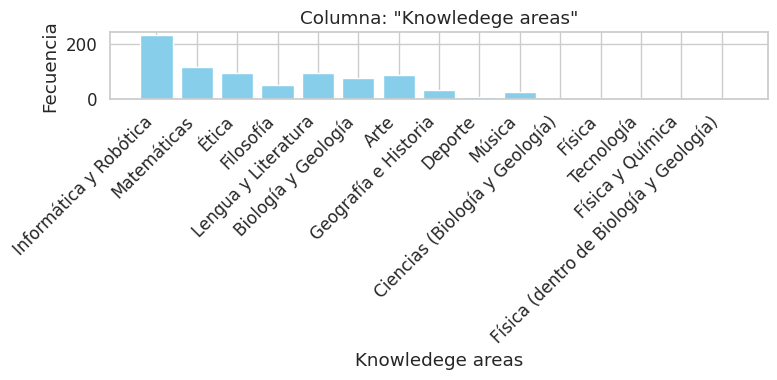


=== 'Cc concepts' ===
  Algoritmia y Programación: 167 recurso(s)
  Análisis de Datos: 102 recurso(s)
  Impacto de la Computación: 97 recurso(s)
  Sistemas Informáticos: 58 recurso(s)
  Redes e Internet: 35 recurso(s)


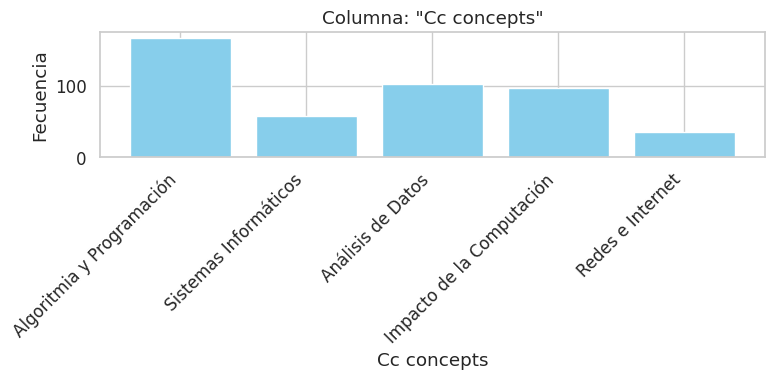


=== 'Ct skills' ===
  Razonamiento Lógico: 236 recurso(s)
  Descomposición: 209 recurso(s)
  Evaluación: 191 recurso(s)
  Pensamiento Algorítmico y Programación: 185 recurso(s)
  Abstracción: 163 recurso(s)
  Patrones: 138 recurso(s)


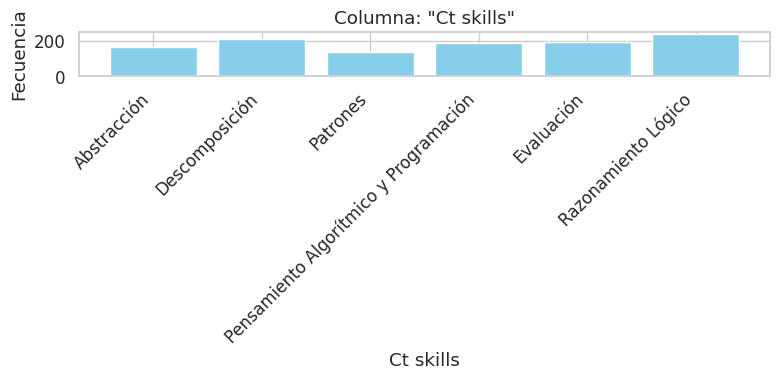


=== 'Duration' ===
  Actividad Rápida (una sola clase): 105 recurso(s)
  Sesión (hasta 2 horas): 53 recurso(s)
  Semana (2-4 sesiones): 48 recurso(s)
  Mes (5-15 sesiones): 26 recurso(s)
  2 Meses (15-30 sesiones): 6 recurso(s)
  Más de 3 Meses (Más de 30 sesiones): 2 recurso(s)


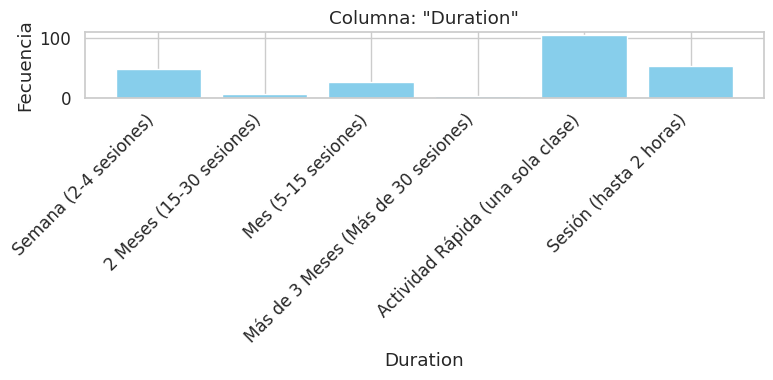


=== 'School years' ===
  1º ESO: 138 recurso(s)
  Tercer Ciclo EP: 132 recurso(s)
  2º ESO: 124 recurso(s)
  3º ESO: 90 recurso(s)
  Segundo Ciclo EP: 86 recurso(s)
  4º ESO: 77 recurso(s)
  1º Bachillerato: 66 recurso(s)
  2º Bachillerato: 56 recurso(s)
  Primer Ciclo EP: 54 recurso(s)
  Educación Infantil: 22 recurso(s)


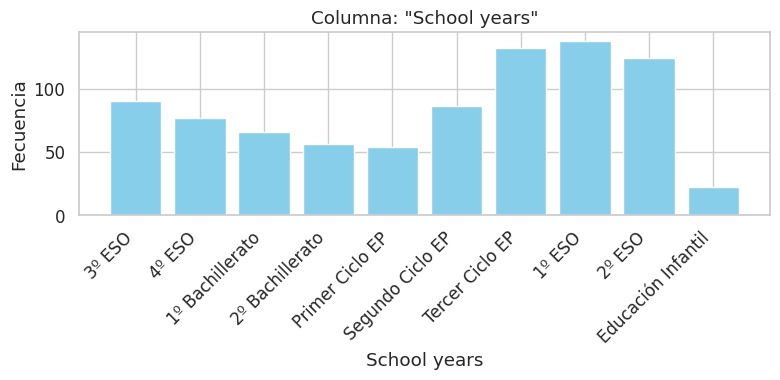


=== 'Languages' ===
  Inglés: 207 recurso(s)
  Español: 46 recurso(s)


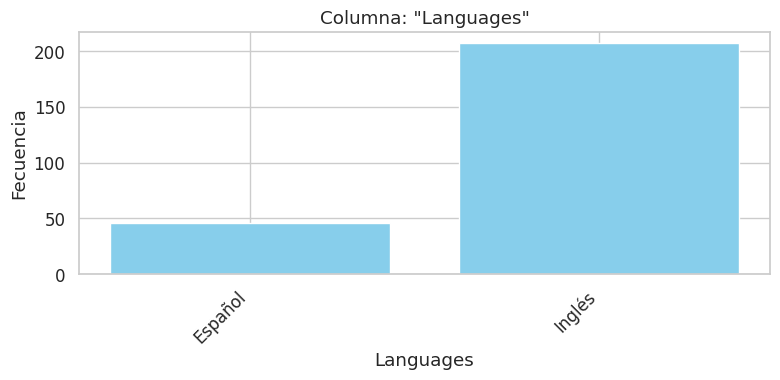

In [8]:
# =====================================================
# 5. Análisis de la distribución de cada columna
# =====================================================
for col in columns_to_analyze:
    # Parseamos la columna (por si tiene múltiples valores)
    list_of_lists = split_multivalue(df[col])

    # Unimos todo en una sola lista para contar frecuencias
    combined = []
    for items in list_of_lists:
        combined.extend(items)

    # Creamos el contador de frecuencia
    counter = Counter(combined)
    
    # Si una columna está realmente vacía (sin datos válidos), continuamos
    if not counter:
        print(f"\n[Columna '{col}'] No tiene datos o todos están vacíos.")
        continue
    
    # Imprimimos la distribución
    print(f"\n=== '{col}' ===")
    for key, count in counter.most_common():
        print(f"  {key}: {count} recurso(s)")

    # Representamos en un gráfico de barras si hay más de un valor
    if len(counter) > 1:        
        plt.figure(figsize=(8, 4))
        plt.bar(counter.keys(), counter.values(), color="skyblue")
        plt.title("Columna: \"" + f"{col}" + "\"")
        plt.xlabel(col)
        plt.ylabel("Fecuencia")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        print("  (Solo existe un valor único en esta columna, sin gráfico.)")